In [2]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report
import os
from tensorflow.keras.optimizers import RMSprop,Adam

In [3]:
TRAINING_APPLE_BRAEBURN = os.path.join("../fruits-360/Training/Banana")
# TESTING_DATASET = os.path.join("fruits-360/Test")
apple_files=os.listdir(TRAINING_APPLE_BRAEBURN)


# Check if files are completely loaded

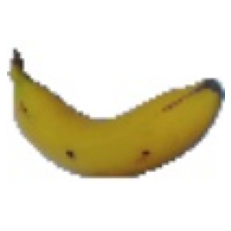

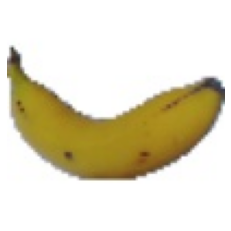

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 20

next_apple_braeburn = [os.path.join(TRAINING_APPLE_BRAEBURN, fname) 
                for fname in apple_files[pic_index-2:pic_index]]
for i, img_path in enumerate(next_apple_braeburn):
  #print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [5]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
split_data = 0.2
Training_directory=os.path.join("../fruits-360/Training")

Testing_directory=os.path.join("../fruits-360/Test")


# USing image augmentation
training_datagen = ImageDataGenerator(
                    rescale = 1./255.,
                    rotation_range = 30,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    vertical_flip = True,
                    fill_mode = 'nearest'
)

testing_datagen = ImageDataGenerator(rescale = 1./255.)

training_data = training_datagen.flow_from_directory(
                    Training_directory,
                    target_size = (32,32), 
                    batch_size = 16,
                    class_mode = 'categorical'
)

testing_data = testing_datagen.flow_from_directory(
                    Testing_directory,
                    target_size = (32,32),
                    batch_size = 16,
                    class_mode = 'categorical',
                    shuffle=False
)
batch_size = 16
training_step = len(training_data)*batch_size
testing_step = len(testing_data)*batch_size
print(testing_step)
print(training_step)


Found 20466 images belonging to 40 classes.
Found 6875 images belonging to 40 classes.
6880
20480


In [6]:
print(20466//batch_size+1)
import numpy as np
#train_images_iter.classes contains a list of classes of each image
unique, counts = np.unique(training_data.classes, return_counts=True)
print ("Different number of classes and their values")
dict(zip(training_data.class_indices, counts))

1280
Different number of classes and their values


{'Apple Braeburn': 492,
 'Apricot': 492,
 'Avocado': 427,
 'Banana': 490,
 'Beetroot': 450,
 'Blueberry': 462,
 'Cactus fruit': 490,
 'Cantaloupe 1': 492,
 'Carambula': 490,
 'Cauliflower': 702,
 'Cherry 1': 492,
 'Chestnut': 450,
 'Clementine': 490,
 'Cocos': 490,
 'Dates': 490,
 'Grape Blue': 984,
 'Guava': 490,
 'Hazelnut': 464,
 'Kiwi': 466,
 'Lemon': 492,
 'Limes': 490,
 'Lychee': 490,
 'Mango': 490,
 'Onion Red': 450,
 'Orange': 479,
 'Papaya': 492,
 'Peach': 492,
 'Pear': 492,
 'Pepino': 490,
 'Physalis': 492,
 'Pineapple': 490,
 'Pitahaya Red': 490,
 'Plum': 447,
 'Pomegranate': 492,
 'Potato Red': 450,
 'Raspberry': 490,
 'Strawberry': 492,
 'Tangelo': 490,
 'Tomato 1': 738,
 'Walnut': 735}

In [7]:
class_labels = testing_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

In [8]:
labels=os.listdir(Training_directory)
number_classes = len(labels)
print(number_classes)
print(len(Training_directory))

class MyCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epochs,logs={}):
        accuracy = logs['acc']
        if (accuracy >= 0.99):
            print("\n Finished because accuracy is greater than 95")
            self.model.stop_training=True


callback = MyCallBack()

40
22


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3),padding="same",input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(number_classes,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1606656   
_________________________________________________________________
dense_1 (Dense)              (None, 40)                4

In [10]:

history = model.fit_generator(
    training_data,
    steps_per_epoch =  20466 // batch_size,
    epochs = 10,
#     callbacks = callbacks,
    validation_data = testing_data,
    validation_steps = 6875 // batch_size,)
# callbacks=[callback])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1279/1279 [==============================] - 900s 704ms/step - loss: 0.6401 - acc: 0.7989 - val_loss: 0.2693 - val_acc: 0.8874
Epoch 2/10
1279/1279 [==============================] - 539s 421ms/step - loss: 0.1866 - acc: 0.9410 - val_loss: 0.2233 - val_acc: 0.9336
Epoch 3/10
1279/1279 [==============================] - 534s 418ms/step - loss: 0.1445 - acc: 0.9600 - val_loss: 0.1771 - val_acc: 0.9768
Epoch 4/10
1279/1279 [==============================] - 510s 399ms/step - loss: 0.1106 - acc: 0.9685 - val_loss: 0.2455 - val_acc: 0.9529
Epoch 5/10
1279/1279 [==============================] - 609s 476ms/step - loss: 0.1210 - acc: 0.9718 - val_loss: 0.1358 - val_acc: 0.9719
Epoch 6/10
1279/1279 [==============================] - 441s 345ms/step - loss: 0.1144 - acc: 0.9759 - val_loss: 0.0555 - val_acc: 0.9822
Epoch 7/10
1279/1279 [==============================] - 446s 349ms/step - loss: 0.1073 - acc: 0.

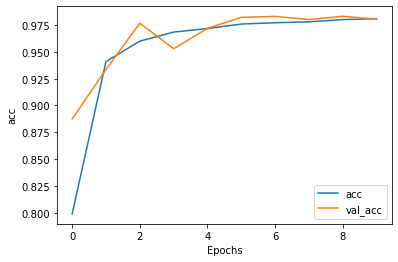

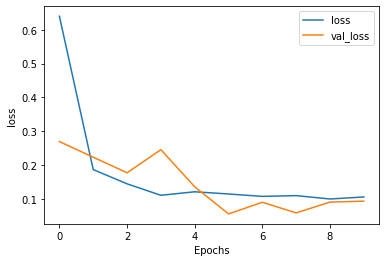

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [12]:
model.save("With 3 layers 32 by 32.h5")

 # With 4 layers using Batch Normalization

In [13]:
model1 = tf.keras.Sequential()
# First layers
model1.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.MaxPooling2D(2,2))
# Second Layer
model1.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(2,2))
# Third Layer
model1.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(2,2))
# Flatten Layer
model1.add(tf.keras.layers.Flatten())
# HIdden Dense layer
model1.add(tf.keras.layers.Dense(1024,activation='relu'))
model1.add(tf.keras.layers.Dropout(0.2))
# Output Layer
model1.add(tf.keras.layers.Dense(number_classes,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 128)        

In [15]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("C:/Users/Ganesh/Documents/tensorflow/Image Processing/models/best_cnn_model_batch_normalization.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

callbacks = [earlystop, checkpoint]

history1 = model1.fit_generator(training_data,
    steps_per_epoch =  20466 // batch_size,
    epochs = 10,
#     callbacks = callbacks,
    validation_data = testing_data,
    validation_steps =  6875 // batch_size,
callbacks=callbacks)

Epoch 1/10
1279/1279 [==============================] - ETA: 0s - loss: 0.6431 - acc: 0.8040
Epoch 00001: val_loss improved from inf to 0.11851, saving model to C:/Users/Ganesh/Documents/tensorflow/Image Processing/models/best_cnn_model_batch_normalization.h5
1279/1279 [==============================] - 778s 608ms/step - loss: 0.6431 - acc: 0.8040 - val_loss: 0.1185 - val_acc: 0.9639
Epoch 2/10
1279/1279 [==============================] - ETA: 0s - loss: 0.2512 - acc: 0.9327
Epoch 00002: val_loss did not improve from 0.11851
1279/1279 [==============================] - 788s 616ms/step - loss: 0.2512 - acc: 0.9327 - val_loss: 0.5561 - val_acc: 0.9114
Epoch 3/10
1279/1279 [==============================] - ETA: 0s - loss: 0.1981 - acc: 0.9525
Epoch 00003: val_loss did not improve from 0.11851
1279/1279 [==============================] - 499s 390ms/step - loss: 0.1981 - acc: 0.9525 - val_loss: 0.4608 - val_acc: 0.9168
Epoch 4/10
1279/1279 [==============================] - ETA: 0s - loss:

In [16]:
model1.evaluate(testing_data)

430/430 [==============================] - 103s 239ms/step - loss: 0.1183 - acc: 0.9639


[0.1183156818151474, 0.9639272689819336]

In [17]:
model1.save("classify_fruit_model_loss.h5")

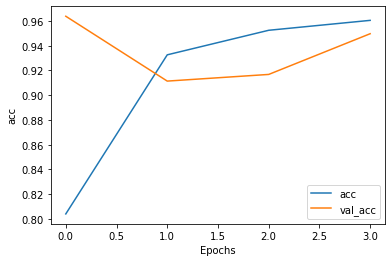

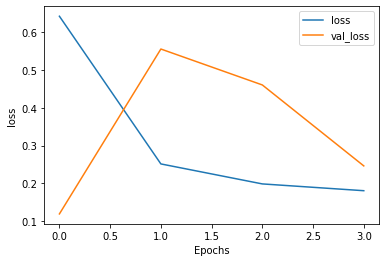

In [18]:
plot_graphs(history1, "acc")
plot_graphs(history1, "loss")

# Printing classification report with first model i.e. 2 conv layers

In [12]:
first_model = tf.keras.models.load_model("With 3 layers 32 by 32.h5")
y_test = testing_data.classes

In [110]:
p_test = first_model.predict_generator(testing_data,testing_step//batch_size,verbose=1,).argmax(axis=1)

Instructions for updating:
Please use Model.predict, which supports generators.
430/430 [==============================] - 141s 327ms/step


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test,p_test))


              precision    recall  f1-score   support

           0       0.76      0.75      0.76       164
           1       1.00      1.00      1.00       164
           2       1.00      1.00      1.00       143
           3       1.00      1.00      1.00       166
           4       1.00      1.00      1.00       150
           5       1.00      1.00      1.00       154
           6       1.00      1.00      1.00       166
           7       1.00      1.00      1.00       164
           8       1.00      1.00      1.00       166
           9       1.00      1.00      1.00       234
          10       1.00      1.00      1.00       164
          11       1.00      1.00      1.00       153
          12       1.00      1.00      1.00       166
          13       1.00      1.00      1.00       166
          14       1.00      1.00      1.00       166
          15       1.00      1.00      1.00       328
          16       1.00      0.89      0.94       166
          17       1.00    

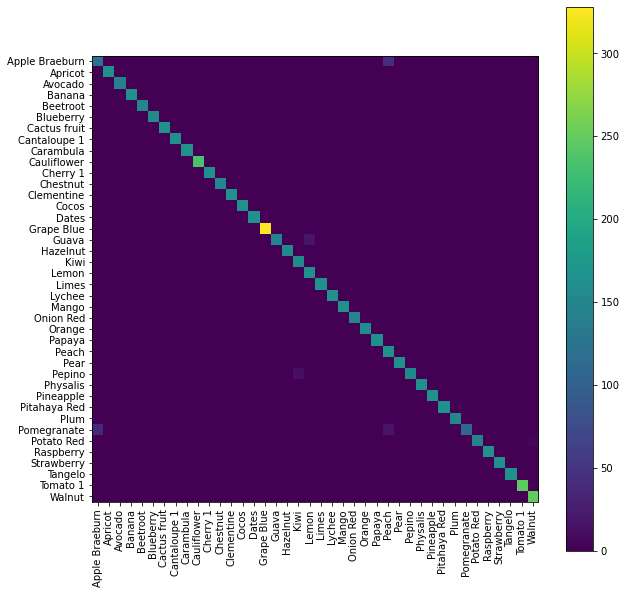

In [11]:
conf = confusion_matrix(y_test,p_test)
plt.figure(figsize=(10,10))
plt.imshow(conf, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

# Printing Classification values with second model i.e. Batch normaliztion

In [111]:
second_model = tf.keras.models.load_model("classify_fruit_model_loss.h5")

In [112]:
pred_test = second_model.predict_generator(testing_data,testing_step//batch_size,verbose=1,).argmax(axis=1)

430/430 [==============================] - 89s 206ms/step


In [14]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       164
           1       0.97      1.00      0.98       164
           2       1.00      1.00      1.00       143
           3       1.00      0.99      1.00       166
           4       1.00      0.63      0.77       150
           5       1.00      0.84      0.91       154
           6       1.00      0.73      0.85       166
           7       1.00      1.00      1.00       164
           8       0.99      1.00      1.00       166
           9       1.00      1.00      1.00       234
          10       1.00      1.00      1.00       164
          11       0.82      0.99      0.90       153
          12       1.00      1.00      1.00       166
          13       0.99      0.95      0.97       166
          14       1.00      1.00      1.00       166
          15       0.88      1.00      0.94       328
          16       1.00      1.00      1.00       166
          17       1.00    

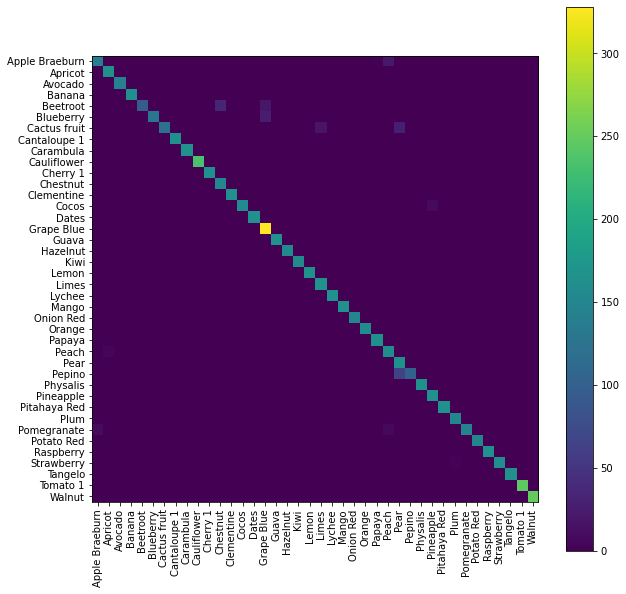

In [15]:
conf = confusion_matrix(y_test,pred_test)
plt.figure(figsize=(10,10))
plt.imshow(conf, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [113]:
# For First Model
count = 0
for i in range(len(y_test)):
    if y_test[i] != p_test[i]:
        count += 1
print('Total number of test cases', ((len(y_test))))
print('Number of wrong predictions', count)


Total number of test cases 6875
Number of wrong predictions 134


In [114]:
# For second Model
count1=0
for i in range(len(y_test)):
    if y_test[i] != pred_test[i]:
        count1 += 1
print('Total number of test cases', ((len(y_test))))
print('Number of wrong predictions', count1)

Total number of test cases 6875
Number of wrong predictions 248


In [117]:
import cv2
model= tf.keras.models.load_model('With 3 layers 32 by 32.h5')
def predict_one_image(img, model):
    img = cv2.resize(img, (32, 32), interpolation = cv2.INTER_CUBIC)
    img = np.reshape(img, (1, 32, 32, 3))
    img = img/255.
    pred = model.predict(img)
    class_num = np.argmax(pred)
    return class_num, np.max(pred)

Blueberry 100%


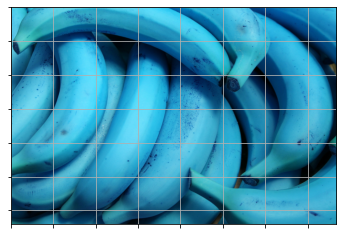

In [119]:
datas=os.listdir("../fruits-360/Test")
test_img = cv2.imread('C:/Users/Ganesh/Downloads/bananas-3700718_1920.jpg')
pred, probability = predict_one_image(test_img,model)
if probability > 0.5:
    print('%s %d%%' % (datas[pred], round(probability, 2) * 100))
    _, ax = plt.subplots(1)
    plt.imshow(test_img)
    # Turn off tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.grid('off')
    plt.show()
else:
    print("This is not fruit photo.Upload a fruit photo")
    _, ax = plt.subplots(1)
    plt.imshow(test_img)
    # Turn off tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.grid('off')
    plt.show()